## Houman Alizadeh
## Physics 300 Project 

# Global Optimization Techniques
         
   The objective of global optimization is to find the globally best solution of (possibly nonlinear) models, in the (possible 
   or known) presence of multiple local optima. Formally, global optimization seeks global solution(s) of a constrained 
   optimization model.
    
![title](http://webgol.dinfo.unifi.it/wordpress/wp-content/uploads/2015/02/globopt.jpg)

   There are many different types of Global Optimization Techniques used in various fields, however we can categorize all of the methods into two general methods: 
    
    
$$Deterministic-methods , Stochastic-methods$$

##### Deterministic Global Optimization: 
Deterministic global optimization methods require ways to rigorously bound function values over regions of space. One could say that a main difference between deterministic and non-deterministic methods in this context is that the former perform calculations over regions of the solution space, whereas the latter perform calculations on single points. This is either done by exploiting particular functional forms, or using interval analysis in order to work with more general functional forms.

Deterministic Methods include: Inner and Outer Aproximation, Cutting plane methods, Branch and bound methods, Interval methods, etc.

##### Stochastic Global Optimization: 
Stochastic optimization (SO) methods are optimization methods that generate and use random variables. For stochastic problems, the random variables appear in the formulation of the optimization problem itself, which involve random objective functions or random constraints. Stochastic optimization methods also include methods with random iterates. Some stochastic optimization methods use random iterates to solve stochastic problems, combining both meanings of stochastic optimization. Stochastic optimization methods generalize deterministic methods for deterministic problems.

Stochastic Methods include: Direct Monte-Carlo sampling, Stochastic tunneling, Parallel tempering, Basin-Hopping, etc.

### Which method is better?
Well this is not as easy question to answer, becuase each of the methods have their own perks. For example, Monte-Carlo can be used in physics-related problems for simulating systems with many coupled degrees of freedom, such as fluids, disordered materials, strongly coupled solids, and cellular structures. And basin hopping can be used to find the global minimum energy of a multuple atom Lennard-Jones Clusters.
Therefore, we cannot choose the best technique for all applications because each method is built for a certain application. I will be demonstrating the Basin Hoppin method for multiple atoms and I will compare my results with the actual data of LJ clusters provided by Wales and Doyle in 1997.

## Basin Hopping Method
Basin-hopping is a global optimization technique that iterates by performing random perturbation of coordinates, performing local optimization, and accepting or rejecting new coordinates based on a minimized function value. The algorithm was described in 1997 by David J. Wales and Jonathan Doye. This method is used mainly on finding the lowest energy for complex atomic interactions. It uses the Lennard-Jones potential of the system to calcualte the minima.

$$ V = 4\epsilon \big[ \big(\frac{\delta}{r}\big)^{12} - \big(\frac{\delta}{r}\big)^{6} \big]$$
where $\epsilon$ = depth of the potential well, $\delta$ =  finite distance at which the inner-particle potential is zero, and r =  the distance between the particles
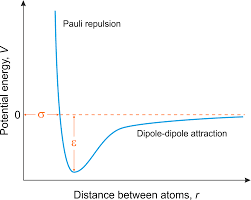

Before we start our code, we have to make sure what our parameters are. In this case, since we are using basin hopping algorithm, we will have three variables such as: Temperature, Stepsize (distance between each iteration), and the number of iterations.

I will be using Porfessor Zhu's built-in code for the lennar-jones cluster:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

def total_energy(positions):
    """
    Calculate the total energy
    input:
    positions: 3*N array which represents the atomic positions
    output
    E: the total energy
    """
    E = 0
    N_atom = int(len(positions)/3)

    #positions = [x0, y0, z0, x1, y1, z1, .....  , xn, yn, zn]
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            dist = np.linalg.norm(pos1-pos2)
            #print(i,j, dist)
            E += LJ(dist)
    return E
            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))

Now we can use the basin hopping optimization from Scipy to calculate the lowest energy for any multiple atoms.

# Basin Hopping for 10 atoms:
For N = 10, I will keep niter & step size constant and will try change the temperature to see the changes:

In [9]:
from scipy.optimize import basinhopping

N_atom = 10
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=30, T=1.0, stepsize=2.0, disp=True)
# niter: Number of iterations
#T: The “temperature” parameter for the accept or reject criterion. Higher “temperatures” mean that larger jumps in function value will be accepted. For best results T should be comparable to the separation (in function value) between local minima.
#stepsize: distance between each iteration 

basinhopping step 0: f -25.427
basinhopping step 1: f -25.427 trial_f -12.3029 accepted 0  lowest_f -25.427
basinhopping step 2: f -26.5217 trial_f -26.5217 accepted 1  lowest_f -26.5217
found new global minimum on step 2 with function value -26.5217
basinhopping step 3: f -26.4905 trial_f -26.4905 accepted 1  lowest_f -26.5217
basinhopping step 4: f -26.4905 trial_f -26.4184 accepted 0  lowest_f -26.5217
basinhopping step 5: f -28.4225 trial_f -28.4225 accepted 1  lowest_f -28.4225
found new global minimum on step 5 with function value -28.4225
basinhopping step 6: f -28.4225 trial_f -23.1493 accepted 0  lowest_f -28.4225
basinhopping step 7: f -28.4225 trial_f -25.427 accepted 0  lowest_f -28.4225
basinhopping step 8: f -28.4225 trial_f -26.5217 accepted 0  lowest_f -28.4225
basinhopping step 9: f -28.4225 trial_f -19.8215 accepted 0  lowest_f -28.4225
basinhopping step 10: f -27.4468 trial_f -27.4468 accepted 1  lowest_f -28.4225
basinhopping step 11: f -27.4468 trial_f -27.4468 acc

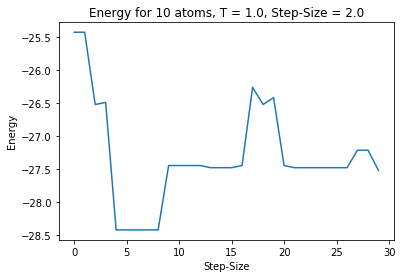

The Global min = -28.4225
Step 5 Global min found


In [17]:
import matplotlib.pyplot as plt
# Let's plot the Energy vs Step Size:
plt.plot([-25.427,-25.427,-26.5217,-26.4905,-28.4225,-28.4225,-28.4225,-28.4225,-28.4225,-27.4468,-27.4468,-27.4468,-27.4468,-27.4797,-27.4797,-27.4797,-27.4468,-26.2616,-26.5217,-26.4184,-27.4468,-27.4797,-27.4797,-27.4797,-27.4797,-27.4797,-27.4797,-27.2139,-27.2139,-27.5223])
plt.xlabel("Step-Size")
plt.ylabel("Energy")
plt.title("Energy for 10 atoms, T = 1.0, Step-Size = 2.0")
plt.show()
print("The Global min = -28.4225")
print("Step 5 Global min found")

In [10]:
N_atom = 10
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=30, T=2.0, stepsize=2.0, disp=True)

basinhopping step 0: f -27.4797
basinhopping step 1: f -26.4429 trial_f -26.4429 accepted 1  lowest_f -27.4797
basinhopping step 2: f -26.4184 trial_f -26.4184 accepted 1  lowest_f -27.4797
basinhopping step 3: f -26.4184 trial_f -22.1863 accepted 0  lowest_f -27.4797
basinhopping step 4: f -26.4184 trial_f -18.7782 accepted 0  lowest_f -27.4797
basinhopping step 5: f -26.4429 trial_f -26.4429 accepted 1  lowest_f -27.4797
basinhopping step 6: f -26.4184 trial_f -26.4184 accepted 1  lowest_f -27.4797
basinhopping step 7: f -26.4429 trial_f -26.4429 accepted 1  lowest_f -27.4797
basinhopping step 8: f -26.1161 trial_f -26.1161 accepted 1  lowest_f -27.4797
basinhopping step 9: f -26.1161 trial_f -23.0435 accepted 0  lowest_f -27.4797
basinhopping step 10: f -27.4797 trial_f -27.4797 accepted 1  lowest_f -27.4797
found new global minimum on step 10 with function value -27.4797
basinhopping step 11: f -27.4797 trial_f -26.4429 accepted 0  lowest_f -27.4797
basinhopping step 12: f -26.4839

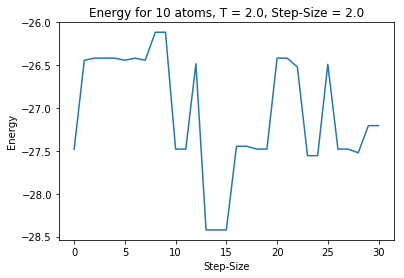

The Global min = -28.4225
Step 15 Global min found


In [25]:
plt.plot([-27.4797,-26.4429,-26.4184,-26.4184,-26.4184,-26.4429,-26.4184,-26.4429,-26.1161,-26.1161,-27.4797,-27.4797,-26.4839,-28.4225,-28.4225,-28.4225,-27.4468,-27.4468,-27.4797,-27.4797,-26.4184,-26.4184,-26.5217,-27.5559,-27.5559,-26.4905,-27.4797,-27.4797,-27.5223,-27.2056,-27.2056])
plt.xlabel("Step-Size")
plt.ylabel("Energy")
plt.title("Energy for 10 atoms, T = 2.0, Step-Size = 2.0")
plt.show()
print("The Global min = -28.4225")
print("Step 15 Global min found")

In [11]:
N_atom = 10
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=30, T=3.0, stepsize=2.0, disp=True)

basinhopping step 0: f -28.4225
basinhopping step 1: f -27.4468 trial_f -27.4468 accepted 1  lowest_f -28.4225
basinhopping step 2: f -26.5792 trial_f -26.5792 accepted 1  lowest_f -28.4225
basinhopping step 3: f -26.558 trial_f -26.558 accepted 1  lowest_f -28.4225
basinhopping step 4: f -26.4165 trial_f -26.4165 accepted 1  lowest_f -28.4225
basinhopping step 5: f -26.5792 trial_f -26.5792 accepted 1  lowest_f -28.4225
basinhopping step 6: f -27.4797 trial_f -27.4797 accepted 1  lowest_f -28.4225
basinhopping step 7: f -25.427 trial_f -25.427 accepted 1  lowest_f -28.4225
basinhopping step 8: f -25.5268 trial_f -25.5268 accepted 1  lowest_f -28.4225
basinhopping step 9: f -27.5559 trial_f -27.5559 accepted 1  lowest_f -28.4225
basinhopping step 10: f -26.4184 trial_f -26.4184 accepted 1  lowest_f -28.4225
basinhopping step 11: f -26.5314 trial_f -26.5314 accepted 1  lowest_f -28.4225
basinhopping step 12: f -26.4184 trial_f -26.4184 accepted 1  lowest_f -28.4225
basinhopping step 13:

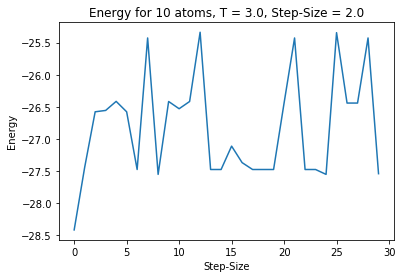

The Global min = -28.4225
Step 0 Global min found


In [26]:
plt.plot([-28.4225,-27.4468,-26.5792,-26.558,-26.4165,-26.5792,-27.4797,-25.427,-27.5559,-26.4184,-26.5314,-26.4184,-25.3378,-27.4797,-27.4797,-27.1149,-27.3723,-27.4797,-27.4797,-27.4797,-26.4429,-25.427,-27.4797,-27.4797,-27.5559,-25.3442,-26.4429,-26.4429,-25.427,-27.5452])
plt.xlabel("Step-Size")
plt.ylabel("Energy")
plt.title("Energy for 10 atoms, T = 3.0, Step-Size = 2.0")
plt.show()
print("The Global min = -28.4225")
print("Step 0 Global min found")

#### Conclusion: 
As we can see, when T = 1.0, we got the global minimum at step 5, when T = 2.0, we got the global minimum at step 15, and when T = 3.0, we got the global minimum at step 0 which is very surprising. From this trend, I can tell that as we increase the T parameter we will get the global minimum in less steps.

# Basin Hopping for 15 atoms:
For N = 15, I will keep T & niter constant and will try change the step size to see the changes:

In [20]:
N_atom = 15
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=20, T=1.5, stepsize=1.5, disp=True)

basinhopping step 0: f -47.5661
basinhopping step 1: f -47.5661 trial_f -44.9009 accepted 0  lowest_f -47.5661
basinhopping step 2: f -47.1566 trial_f -47.1566 accepted 1  lowest_f -47.5661
basinhopping step 3: f -47.1566 trial_f -43.1764 accepted 0  lowest_f -47.5661
basinhopping step 4: f -48.2461 trial_f -48.2461 accepted 1  lowest_f -48.2461
found new global minimum on step 4 with function value -48.2461
basinhopping step 5: f -48.2461 trial_f -45.6221 accepted 0  lowest_f -48.2461
basinhopping step 6: f -48.2461 trial_f -24.1134 accepted 0  lowest_f -48.2461
basinhopping step 7: f -48.2461 trial_f -18.8287 accepted 0  lowest_f -48.2461
basinhopping step 8: f -48.2461 trial_f -45.9347 accepted 0  lowest_f -48.2461
basinhopping step 9: f -48.6125 trial_f -48.6125 accepted 1  lowest_f -48.6125
found new global minimum on step 9 with function value -48.6125
basinhopping step 10: f -52.3226 trial_f -52.3226 accepted 1  lowest_f -52.3226
found new global minimum on step 10 with function

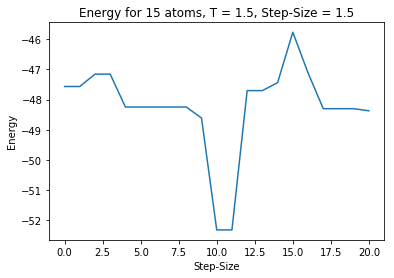

The Global min = -52.3226
Step 10 Global min found


In [29]:
plt.plot([-47.5661,-47.5661,-47.1566,-47.1566,-48.2461,-48.2461,-48.2461,-48.2461,-48.2461,-48.6125,-52.3226,-52.3226,-47.7024,-47.7024,-47.4403,-45.767,-47.1132,-48.302,-48.302,-48.302,-48.3722])
plt.xlabel("Step-Size")
plt.ylabel("Energy")
plt.title("Energy for 15 atoms, T = 1.5, Step-Size = 1.5")
plt.show()
print("The Global min = -52.3226")
print("Step 10 Global min found")

In [21]:
N_atom = 15
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=20, T=1.5, stepsize=2.5, disp=True)

basinhopping step 0: f -42.7549
basinhopping step 1: f -51.3726 trial_f -51.3726 accepted 1  lowest_f -51.3726
found new global minimum on step 1 with function value -51.3726
basinhopping step 2: f -51.3659 trial_f -51.3659 accepted 1  lowest_f -51.3726
basinhopping step 3: f -51.3659 trial_f -47.2602 accepted 0  lowest_f -51.3726
basinhopping step 4: f -51.3659 trial_f -44.3838 accepted 0  lowest_f -51.3726
basinhopping step 5: f -51.3659 trial_f -46.4984 accepted 0  lowest_f -51.3726
basinhopping step 6: f -52.3226 trial_f -52.3226 accepted 1  lowest_f -52.3226
found new global minimum on step 6 with function value -52.3226
basinhopping step 7: f -52.3226 trial_f -42.0404 accepted 0  lowest_f -52.3226
basinhopping step 8: f -51.3659 trial_f -51.3659 accepted 1  lowest_f -52.3226
basinhopping step 9: f -51.3659 trial_f -49.4782 accepted 0  lowest_f -52.3226
basinhopping step 10: f -51.3659 trial_f -42.3883 accepted 0  lowest_f -52.3226
basinhopping step 11: f -51.3659 trial_f -46.4186

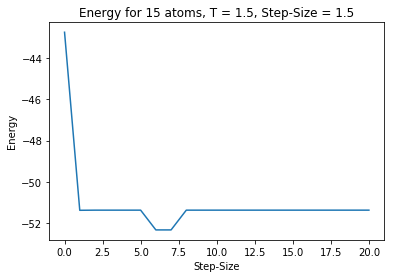

The Global min = -52.3226
Step 6 Global min found


In [28]:
plt.plot([-42.7549,-51.3726,-51.3659,-51.3659,-51.3659,-51.3659,-52.3226,-52.3226,-51.3659,-51.3659,-51.3659,-51.3659,-51.3659,-51.3659,-51.3659,-51.3659,-51.3659,-51.3659,-51.3659,-51.3659,-51.3659])
plt.xlabel("Step-Size")
plt.ylabel("Energy")
plt.title("Energy for 15 atoms, T = 1.5, Step-Size = 1.5")
plt.show()
print("The Global min = -52.3226")
print("Step 6 Global min found")

In [22]:
N_atom = 15
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=20, T=1.5, stepsize=3.5, disp=True)

basinhopping step 0: f -42.4877
basinhopping step 1: f -49.3556 trial_f -49.3556 accepted 1  lowest_f -49.3556
found new global minimum on step 1 with function value -49.3556
basinhopping step 2: f -51.3726 trial_f -51.3726 accepted 1  lowest_f -51.3726
found new global minimum on step 2 with function value -51.3726
basinhopping step 3: f -51.3726 trial_f -47.3151 accepted 0  lowest_f -51.3726
basinhopping step 4: f -51.3726 trial_f -45.6856 accepted 0  lowest_f -51.3726
basinhopping step 5: f -51.3726 trial_f -46.6367 accepted 0  lowest_f -51.3726
basinhopping step 6: f -50.4149 trial_f -50.4149 accepted 1  lowest_f -51.3726
basinhopping step 7: f -50.4149 trial_f -49.3196 accepted 0  lowest_f -51.3726
basinhopping step 8: f -50.4149 trial_f -49.3175 accepted 0  lowest_f -51.3726
basinhopping step 9: f -50.4149 trial_f -45.3934 accepted 0  lowest_f -51.3726
basinhopping step 10: f -50.4149 trial_f -49.5048 accepted 0  lowest_f -51.3726
basinhopping step 11: f -50.4149 trial_f -47.5129

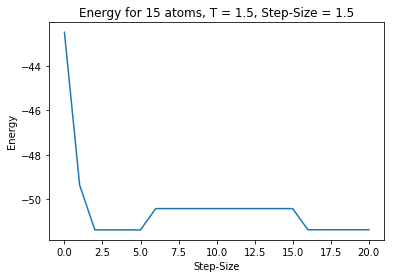

The Global min = -52.3226
True Global min hasn't been found


In [30]:
plt.plot([-42.4877,-49.3556,-51.3726,-51.3726,-51.3726,-51.3726,-50.4149,-50.4149,-50.4149,-50.4149,-50.4149,-50.4149,-50.4149,-50.4149,-50.4149,-50.4149,-51.3659,-51.3659,-51.3659,-51.3659,-51.3659])
plt.xlabel("Step-Size")
plt.ylabel("Energy")
plt.title("Energy for 15 atoms, T = 1.5, Step-Size = 1.5")
plt.show()
print("The Global min = -52.3226")
print("True Global min hasn't been found")

#### Conclusion: 
We kept T & niter constants and changed our Step-Size. when Step-Size = 1.5, we got the global minimum at step 10, when Step-Size = 2.5, we got the global minimum at step 6, and when Step-Size = 3.5, we were not given the actual global minimum. It seems that keeping the Step-Size around 2.0 gives us the best result. And increasing the Step-Size above 3.0 gives us completely wrong global min.

# Basin Hopping for 12 atoms:
For N = 12, I will keep change all of the parameters:

In [14]:
from scipy.optimize import basinhopping
N_atom = 12
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=10, T=2.0, stepsize=1.5, disp=True)

basinhopping step 0: f -32.0393
basinhopping step 1: f -34.0848 trial_f -34.0848 accepted 1  lowest_f -34.0848
found new global minimum on step 1 with function value -34.0848
basinhopping step 2: f -34.0848 trial_f -6 accepted 0  lowest_f -34.0848
basinhopping step 3: f -35.3123 trial_f -35.3123 accepted 1  lowest_f -35.3123
found new global minimum on step 3 with function value -35.3123
basinhopping step 4: f -35.3123 trial_f -27.5559 accepted 0  lowest_f -35.3123
basinhopping step 5: f -35.3123 trial_f -27.5559 accepted 0  lowest_f -35.3123
basinhopping step 6: f -35.3123 trial_f -22.3489 accepted 0  lowest_f -35.3123
basinhopping step 7: f -35.1709 trial_f -35.1709 accepted 1  lowest_f -35.3123
basinhopping step 8: f -35.1709 trial_f -26.1996 accepted 0  lowest_f -35.3123
basinhopping step 9: f -37.9676 trial_f -37.9676 accepted 1  lowest_f -37.9676
found new global minimum on step 9 with function value -37.9676
basinhopping step 10: f -35.3704 trial_f -35.3704 accepted 1  lowest_f 

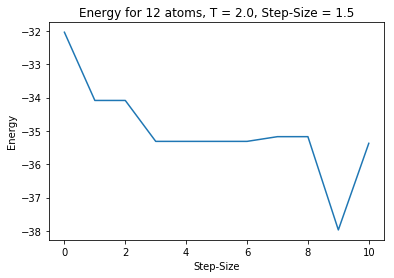

The Global min = -37.9676
Step 9 Global min found


In [19]:
plt.plot([-32.0393,-34.0848,-34.0848,-35.3123,-35.3123,-35.3123,-35.3123,-35.1709,-35.1709,-37.9676,-35.3704])
plt.xlabel("Step-Size")
plt.ylabel("Energy")
plt.title("Energy for 12 atoms, T = 2.0, Step-Size = 1.5")
plt.show()
print("The Global min = -37.9676")
print("Step 9 Global min found")

In [15]:
N_atom = 12
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=20, T=1.7, stepsize=2.0, disp=True)

basinhopping step 0: f -36.2532
basinhopping step 1: f -36.2532 trial_f -35.4795 accepted 0  lowest_f -36.2532
basinhopping step 2: f -36.2532 trial_f -31.7738 accepted 0  lowest_f -36.2532
basinhopping step 3: f -36.2532 trial_f -35.1775 accepted 0  lowest_f -36.2532
basinhopping step 4: f -36.2532 trial_f -26.5792 accepted 0  lowest_f -36.2532
basinhopping step 5: f -36.2532 trial_f -35.5024 accepted 0  lowest_f -36.2532
basinhopping step 6: f -33.9867 trial_f -33.9867 accepted 1  lowest_f -36.2532
basinhopping step 7: f -35.3123 trial_f -35.3123 accepted 1  lowest_f -36.2532
basinhopping step 8: f -32.7662 trial_f -32.7662 accepted 1  lowest_f -36.2532
basinhopping step 9: f -34.0884 trial_f -34.0884 accepted 1  lowest_f -36.2532
basinhopping step 10: f -35.0555 trial_f -35.0555 accepted 1  lowest_f -36.2532
basinhopping step 11: f -35.0555 trial_f -33.9628 accepted 0  lowest_f -36.2532
basinhopping step 12: f -35.0555 trial_f -27.2139 accepted 0  lowest_f -36.2532
basinhopping step

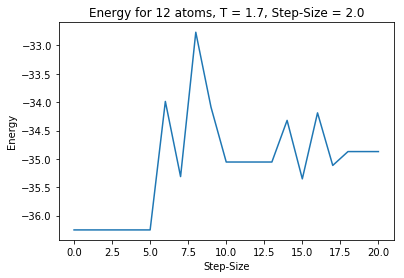

The Global min = -37.9676
True Global min hasn't been found


In [20]:
plt.plot([-36.2532,-36.2532,-36.2532,-36.2532,-36.2532,-36.2532,-33.9867,-35.3123,-32.7662,-34.0884,-35.0555,-35.0555,-35.0555,-35.0555,-34.3209,-35.3526,-34.1883,-35.1156,-34.8713,-34.8713,-34.8713])
plt.xlabel("Step-Size")
plt.ylabel("Energy")
plt.title("Energy for 12 atoms, T = 1.7, Step-Size = 2.0")
plt.show()
print("The Global min = -37.9676")
print("True Global min hasn't been found")

In [3]:
from scipy.optimize import basinhopping
N_atom = 12
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=30, T=2.0, stepsize=2.0, disp=True)

basinhopping step 0: f -36.1779
basinhopping step 1: f -36.1779 trial_f -28.4225 accepted 0  lowest_f -36.1779
basinhopping step 2: f -35.3249 trial_f -35.3249 accepted 1  lowest_f -36.1779
basinhopping step 3: f -35.3249 trial_f -27.2139 accepted 0  lowest_f -36.1779
basinhopping step 4: f -37.9676 trial_f -37.9676 accepted 1  lowest_f -37.9676
found new global minimum on step 4 with function value -37.9676
basinhopping step 5: f -35.4659 trial_f -35.4659 accepted 1  lowest_f -37.9676
basinhopping step 6: f -35.1594 trial_f -35.1594 accepted 1  lowest_f -37.9676
basinhopping step 7: f -35.1594 trial_f -30.9143 accepted 0  lowest_f -37.9676
basinhopping step 8: f -36.243 trial_f -36.243 accepted 1  lowest_f -37.9676
basinhopping step 9: f -36.1779 trial_f -36.1779 accepted 1  lowest_f -37.9676
basinhopping step 10: f -34.8284 trial_f -34.8284 accepted 1  lowest_f -37.9676
basinhopping step 11: f -35.3181 trial_f -35.3181 accepted 1  lowest_f -37.9676
basinhopping step 12: f -35.3181 tr

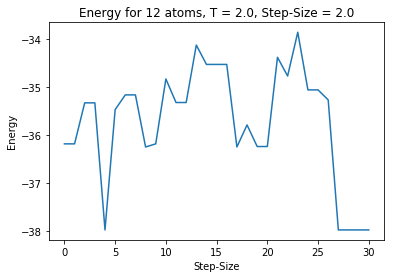

The Global min = -37.9676
Step 4 Global min found


In [4]:
plt.plot([-36.1779,-36.1779,-35.3249,-35.3249,-37.9676,-35.4659,-35.1594,-35.1594,-36.243,-36.1779,-34.8284,-35.3181,-35.3181,-34.1235,-34.5259,-34.5259,-34.5259,-36.243,-35.7842,-36.2332,-36.2332,-34.3772,-34.7671,-33.8566,-35.0555,-35.0555,-35.2638,-37.9676,-37.9676,-37.9676,-37.9676])
plt.xlabel("Step-Size")
plt.ylabel("Energy")
plt.title("Energy for 12 atoms, T = 2.0, Step-Size = 2.0")
plt.show()
print("The Global min = -37.9676")
print("Step 4 Global min found")

#### Conclusion: 
For N = 12, it was very difficult to find the global min. I found out that it's very important for T to be around 2.0, and Step-Size to be from 1.0 - 2.0 to get correct results. Of course, putting more iteration can be helpful too.

This raps up our fun project of showing how basin hopping works and how it can be helpful to find the LJ clusters of different atomic structures. We discussed the importance of Global Optimization methods and gave an example of one of the most important methods in Global Optimization (Basin Hopping). If you are more interested, you can try the other methods to see the difference with Basin Hopping.

## Reference:
 1. Global Optimization by Basin-Hopping and the Lowest Energy Structures of Lennard-Jones Clusters Containing up to 110 Atoms
    David J. Wales* and Jonathan P. K. Doye
    The Journal of Physical Chemistry A 1997 101 (28), 5111-5116
    DOI: 10.1021/jp970984n
 2. Doye, J. P., & Wales, D. J. (1996). The Structure and Stability of Atomic Liquids: From Clusters to Bulk. Science, 271  (5248), 484-487. doi:10.1126/science.271.5248.484
    